# Building A Handwritten Digits Classifier

<p style="text-align:center;">
  <img src="https://plus.unsplash.com/premium_photo-1679092789931-a9111406183b?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80" width="800" height="100">
  <br>
  Source: <a href="https://unsplash.com/">Unsplash</a>
</p>


Adding hidden layers of neurons to a neural network can improve its ability to capture nonlinearity in data. To demonstrate this, we tested different neural network models on a dataset we generated with deliberate nonlinearity.

In this project, we will:

- explore the challenges of image classification
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve several deep neural networks for image classification

Over the past decade, deep neural networks have achieved state-of-the-art performance in image classification tasks. For some image classification tasks, deep neural networks have even surpassed human benchmark performance. We can learn more about the history of deep neural networks in [this paper](https://arxiv.org/pdf/1803.01164.pdf).

In this project, we will build models that can classify handwritten digits. Before 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and other handwritten text. Their approach, which involved pre-processing handwritten images and feeding them to a neural network model, is detailed in [this paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).

**Why is image classification a hard task?**

In the field of machine learning and pattern recognition, image classification, especially for handwritten text, is considered challenging for several reasons.

Firstly, each image in a training set is high-dimensional, with each pixel in an image serving as a feature and a separate column. For instance, a 128 x 128 image has 16,384 features.

Secondly, images are often downsampled to lower resolutions and transformed to grayscale, which limits their level of detail. This is due to limitations in computing power. For instance, an 8-megapixel photo has 3264 by 2448 pixels, resulting in a total of 7,990,272 features. For significantly faster processing, images of this resolution are usually scaled down to between 128 and 512 pixels in either direction. However, this often results in a loss of detail, which could have been useful for training and pattern matching.

Thirdly, the features in an image do not have an obvious linear or nonlinear relationship that can be learned using models like linear or logistic regression. In grayscale, each pixel is merely represented by a brightness value ranging from 0 to 256.

Here's an example of how an image is represented across the different abstractions we care about:

<p style="text-align:center;">
  <img src="https://s3.amazonaws.com/dq-content/244/single_image.svg" width="600" height="100">
  <br>
  Source: <a href="https://www.dataquest.io/">DataQuest</a>
</p>

**Why is deep learning effective in image classification?**

The effectiveness of deep learning in image classification stems from the models' ability to learn hierarchical representations. Essentially, a deep learning model can learn intermediate representations at each layer of the model and leverage them during the prediction process. The following diagram illustrates the weights that each layer represents in a convolutional neural network, a type of network commonly used in image classification. It was trained to identify faces, although it falls outside the scope of this project.

<p style="text-align:center;">
  <img src="https://s3.amazonaws.com/dq-content/244/nn_learns_hierarchy.png" width="700" height="100">
  <br>
  Source: <a href="https://www.dataquest.io/">DataQuest</a>
</p>

As we observe, in the first hidden layer, the network appears to have learned to represent edges and distinct facial features. Moving on to the second hidden layer, the weights appear to represent more complex facial features such as eyes and noses. Finally, the weights in the last hidden layer appear to resemble faces that can be compared against. Each subsequent layer leverages the weights from previous layers to learn more complex representations.

This project aims to investigate the effectiveness of deep, feedforward neural networks in image classification.


## Working With Image Data

Scikit-learn provides several pre-loaded datasets in the `sklearn.datasets` namespace, including the hand-written digits dataset from UCI, which can be loaded using the `load_digits()` function.

Since dataframes represent data in a tabular format, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape it to its original dimensions of 28 x 28 pixels and plot it on a coordinate grid.

To reshape the image, we can convert a training example to a numpy array (excluding the `label` column) and use the [numpy.reshape()](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) function.

We can visualize the image using the [pyplot.imshow()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=matplotlib%20pyplot%20imshow#matplotlib.pyplot.imshow)function. If we want to display multiple images in a single matplotlib figure, we can use the equivalent [axes.imshow()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html?highlight=axes%20imshow#matplotlib.axes.Axes.imshow) function.

We will import the necessary libraries and load the dataset to gain a better understanding of it by visualizing some images.

In [1]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import the digits dataset
from sklearn.datasets import load_digits

In [2]:
# Load the digits dataset
digits = load_digits()

The dictionary returned by `load_digits()` contains several keys. Let's examine them to see what information they provide.

In [3]:
# Check the key names in the 'digits'
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

The `data` and `target` are the most relevant keys in the returned dictionary. To make the data easier to work with, we can convert the `data` array (which is a NumPy 2D array) into a Pandas DataFrame and the `target` array (which is a NumPy 1D array) into a Pandas Series.

In [4]:
# Transform 'data' into dataframe
data = pd.DataFrame(digits['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
# Check the number of rows and columns in the dataset
data.shape

(1797, 64)

The loaded hand digits data has been transformed into a pandas dataframe with 1797 rows and 64 columns. Each row represents an image of a handwritten digit, and each column represents a pixel in the image. The values in the dataframe are the grayscale intensity values of each pixel, ranging from 0 to 16.

Let's transform the target.

In [6]:
# Transform 'target' into series
labels = pd.Series(digits['target'])
labels

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int32

Our next step is to use matplotlib to visualize some images in the dataset. Specifically, we will create a scatter plot grid with 2 rows and 4 columns, where:

- The first row displays the images corresponding to rows 0, 100, 200, and 300.
- The second row displays the images corresponding to rows 1000, 1100, 1200, and 1300.

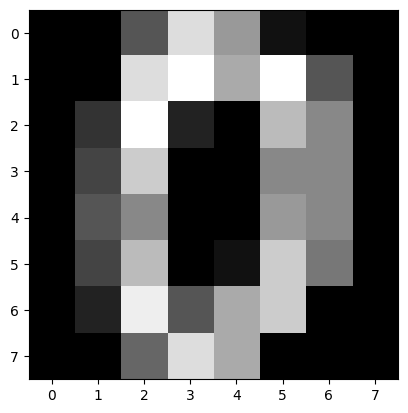

In [7]:
# Display the image in the first row
first_img = data.iloc[0]
first_img_arr = first_img.values.reshape(8, 8)

plt.imshow(first_img_arr, cmap='gray')
plt.show()

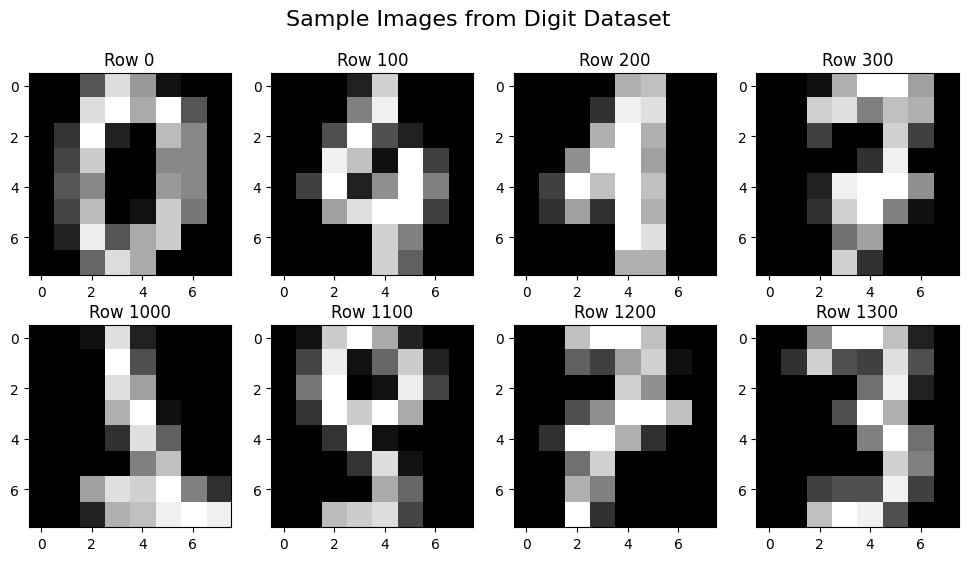

In [8]:
# Create scatter plot grid
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Sample Images from Digit Dataset', fontsize=16)

# Display images from first row
ax[0, 0].imshow(data.iloc[0, :].values.reshape(8, 8), cmap='gray')
ax[0, 0].set_title('Row 0')
ax[0, 1].imshow(data.iloc[100, :].values.reshape(8, 8), cmap='gray')
ax[0, 1].set_title('Row 100')
ax[0, 2].imshow(data.iloc[200, :].values.reshape(8, 8), cmap='gray')
ax[0, 2].set_title('Row 200')
ax[0, 3].imshow(data.iloc[300, :].values.reshape(8, 8), cmap='gray')
ax[0, 3].set_title('Row 300')

# Display images from second row
ax[1, 0].imshow(data.iloc[1000, :].values.reshape(8, 8), cmap='gray')
ax[1, 0].set_title('Row 1000')
ax[1, 1].imshow(data.iloc[1100, :].values.reshape(8, 8), cmap='gray')
ax[1, 1].set_title('Row 1100')
ax[1, 2].imshow(data.iloc[1200, :].values.reshape(8, 8), cmap='gray')
ax[1, 2].set_title('Row 1200')
ax[1, 3].imshow(data.iloc[1300, :].values.reshape(8, 8), cmap='gray')
ax[1, 3].set_title('Row 1300')

plt.show()

## K-Nearest Neighbors Model

The k-nearest neighbors algorithm is a non-parametric machine learning algorithm that doesn't make assumptions about the linearity between the features and the output labels, unlike linear and logistic regression models. Therefore, k-nearest neighbors can capture nonlinearity in the data. As the k-nearest neighbors algorithm doesn't have a specific model representation, it's referred to as an algorithm and not a model.

To make predictions, the k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to find similar (or the "nearest") observations. The algorithm then assigns the label with the most nearby observations as the prediction for the unseen observation.

We can use the [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) package from scikit-learn to train and test k-nearest neighbors models.

To ensure that our k-nearest neighbors models are properly evaluated, we will begin by splitting the data into separate training and test sets. Once this is done, we can set up a pipeline that allows us to efficiently train and test our k-nearest neighbors models.

In [9]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier


# Function to train knn 
def train_knn(num_neighbors, train_features, train_labels):
    """
    This function trains a KNN model with the given number of neighbors and the provided training features and labels.

    Args:
    - num_neighbors (int): Number of neighbors to be considered in the KNN model.
    - train_features (pandas dataframe): Dataframe containing the training features.
    - train_labels (pandas series): Series containing the training labels.

    Returns:
    - knn (KNeighborsClassifier object): Trained KNN model.
    """
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(train_features, train_labels)
    return knn


# Function to test model accuracy
def test(model, test_features, test_labels):
    """
    This function tests the given model using the provided test features and labels and returns the overall accuracy.
    
    Args:
    - model (Classifier object): Trained model.
    - test_features (pandas dataframe): Dataframe containing the test features.
    - test_labels (pandas series): Series containing the test labels.

    Returns:
    - overall_accuracy (float): Overall accuracy of the model.
    """
    y_preds = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['true_label'] = test_labels
    train_test_df['pred_label'] = y_preds
    overall_accuracy = sum(train_test_df['true_label'] == train_test_df['pred_label'])/len(train_test_df)
    return overall_accuracy


# Function to perform 4-fold cross validation
def cross_validate(k):
    """
    This function performs 4-fold cross validation using 'train_knn()' and 'test_knn()'.
    
    Args:
    - k (int): Number of neighbors to be considered in the KNN model.

    Returns:
    - fold_accuracies (list): List of accuracies obtained in each fold of the cross validation.
    """
    fold_accuracies = []
    kf = KFold(n_splits=4, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(data):
        # split 'data' into train, test features
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        # split 'label' into train, test labels
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies      

Let's use our functions to explore the effect of different values of `k` on classification accuracy and visualize the results using a plot.

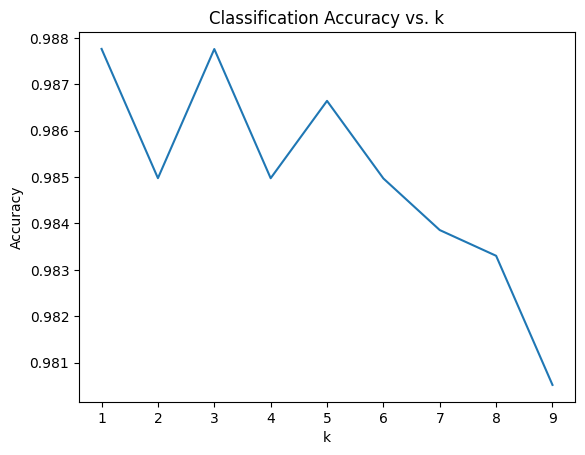

In [10]:
# List of k values to test
k_values = list(range(1, 10))

# Train and test models for each k value, and store the resulting accuracies
accuracies = []
for k in k_values:
    avg_accuracy = np.mean(cross_validate(k))
    accuracies.append(avg_accuracy)

# Plot the accuracies for each k value
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy vs. k')
plt.show()

Based on the experiment, 4-fold cross-validation was performed to test the k-nearest neighbors classifier for different values of `k`. `k` values ranging from 1 to 9 were tested, and the average accuracy across the four folds was computed and stored in the accuracies list.

According to the plotted accuracies, the highest accuracy was achieved with `k = 1` and `k = 3` at 0.988, while the lowest accuracy was obtained with `k = 9` at 0.980. The accuracies for `k` values in the middle range from 0.987 to 0.983, indicating that these values are also suitable choices for `k`.

## Neural Network With One Hidden Layer

Some of the drawbacks of using k-nearest neighbors are:

- High memory usage since, for each new unseen observation, many comparisons need to be made to seen observations.
- No model representation to debug and explore.

To overcome these limitations, we can try using a neural network with a single hidden layer. We can use the [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) package from scikit-learn for this purpose.

Now we'll perform 4-fold cross-validation and train/test multiple neural network models using a single hidden layer with different numbers of neurons:

- A model with 8 neurons
- A model with 16 neurons
- A model with 32 neurons
- A model with 64 neurons
- A model with 128 neurons
- A model with 256 neurons

In [11]:
from sklearn.neural_network import MLPClassifier


# Function to train a neural network model
def train_nn(num_neurons, train_features, train_labels):
    """
    This function trains a neural network model with the given number of neurons and the provided training features and labels.

    Args:
    - num_neurons (tuple): Number of neurons in the hidden layer.
    - train_features (pandas dataframe): Dataframe containing the training features.
    - train_labels (pandas series): Series containing the training labels.

    Returns:
    - nn (MLPClassifier object): Trained neural network model.
    """
    nn = MLPClassifier(hidden_layer_sizes=num_neurons, max_iter=1000, random_state=2)
    nn.fit(train_features, train_labels)
    return nn

# Function to perform 4-fold cross validation
def cross_validate(num_neurons):
    """
    This function performs 4-fold cross validation using 'train_nn()' and 'test()' to train and test a neural network model.
    
    Args:
    - num_neurons (tuple): Number of neurons in the hidden layer.

    Returns:
    - fold_accuracies (list): List of accuracies obtained in each fold of the cross validation.
    """
    fold_accuracies = []
    kf = KFold(n_splits=4, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(data):
        # split 'data' into train, test features
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        # split 'label' into train, test labels
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(num_neurons, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

Let's evaluate the performance of multiple neural network models using a single hidden layer with different numbers of neurons.

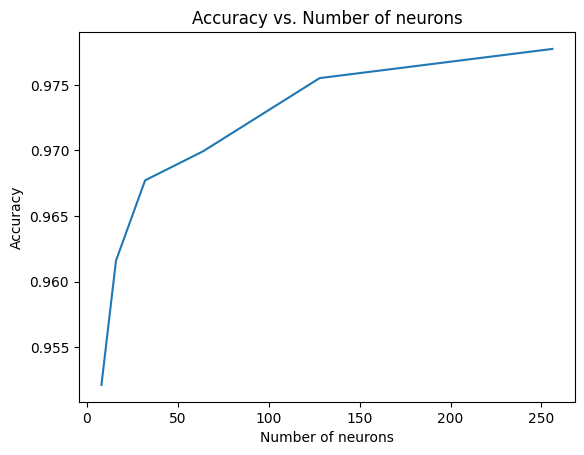

In [12]:
# Define the number of neurons to test
nn_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]

# Test the neural network models with different numbers of neurons
accuracies = []
for num_neurons in nn_neurons:
    fold_accuracies = cross_validate(num_neurons)
    avg_accuracy = np.mean(fold_accuracies)
    accuracies.append(avg_accuracy)
    
# Plot the accuracies for different numbers of neurons
plt.plot(nn_neurons, accuracies)
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of neurons')
plt.show()

Based on the accuracies, the performance of the models can be ranked in descending order as follows:

1. Model with 256 neurons - accuracy of 0.9777
2. Model with 128 neurons - accuracy of 0.9755
3. Model with 64 neurons - accuracy of 0.9699
4. Model with 32 neurons - accuracy of 0.9677
5. Model with 16 neurons - accuracy of 0.9616
6. Model with 8 neurons - accuracy of 0.9521

It appears that none of the models start to overfit since the accuracy generally improves as the number of neurons increases. However, to be certain, we would need to compute and visualize the performance for both the train and test sets to see if they diverge for any of the models.

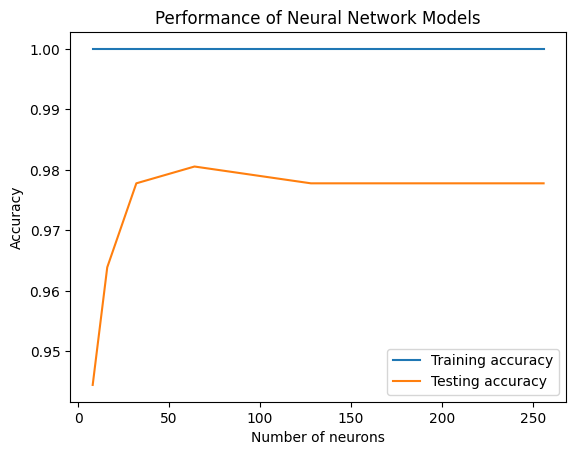

In [13]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train and test models for each number of neurons
train_accuracies = []
test_accuracies = []
for num_neurons in nn_neurons:
    nn = MLPClassifier(hidden_layer_sizes=num_neurons, max_iter=1000, random_state=42)
    nn.fit(train_features, train_labels)
    train_accuracy = nn.score(train_features, train_labels)
    test_accuracy = nn.score(test_features, test_labels)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(nn_neurons, train_accuracies, label='Training accuracy')
plt.plot(nn_neurons, test_accuracies, label='Testing accuracy')
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.title('Performance of Neural Network Models')
plt.legend()
plt.show()

The models seem to be overfitting. This is evident from the fact that the training accuracies for these models are close to 100%, while the test accuracies are not improving much after a certain point.

## Neural Network With Two Hidden Layers

Increasing the number of neurons in a single hidden layer significantly enhanced the accuracy of the classification. To further improve the model's performance, we will experiment with using two hidden layers and increasing the number of neurons in each layer.

To implement this, we will update the neural network training pipeline to incorporate 2 hidden layers. We will then use 4-fold cross-validation to train the neural network models with the following specifications:

- A model with two hidden layers, each having 64 neurons
- A model with two hidden layers, each having 128 neurons
- A model with two hidden layers, each having 256 neurons

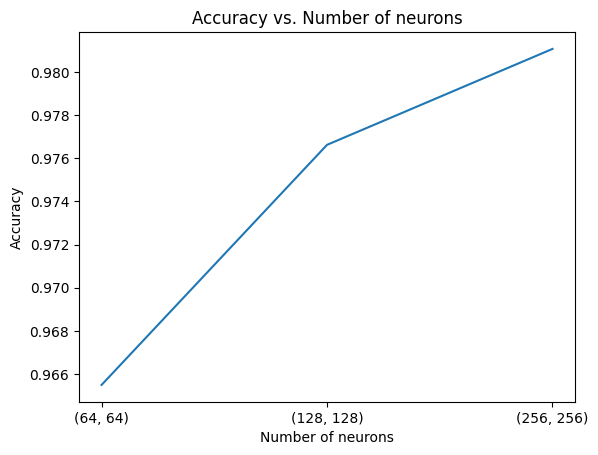

In [14]:
# Define number of neurons with two hidden layers for each model
nn_two_neurons = [
    (64, 64),
    (128, 128),
    (256, 256)
]

# Test the neural network models with different numbers of neurons
accuracies = []
for num_neurons in nn_two_neurons:
    fold_accuracies = cross_validate(num_neurons)
    avg_accuracy = np.mean(fold_accuracies)
    accuracies.append(avg_accuracy)

# Plot the accuracies for different numbers of neurons
plt.plot([str(nn) for nn in nn_two_neurons], accuracies)
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of neurons')
plt.show()

Based on the accuracies obtained from cross-validation, the ranking of the models in terms of performance is:

1. Model with two hidden layers and 256 neurons in each layer - accuracy of 0.9810
2. Model with two hidden layers and 128 neurons in each layer - accuracy of 0.9766
3. Model with two hidden layers and 64 neurons in each layer - accuracy of 0.9654

The model with the highest accuracy is the one with two hidden layers and 256 neurons in each layer, followed by the model with two hidden layers and 128 neurons in each layer, and finally the model with two hidden layers and 64 neurons in each layer has the lowest accuracy.

## Neural Network With Three Hidden Layers

We can increase the number of folds used for k-fold cross-validation to 6 in order to help prevent overfitting while testing neural networks with 3 hidden layers. This is because using more hidden layers is known to increase the amount of overfitting that occurs.

In [15]:
# Function to perform 6-fold cross validation
def cross_validate(num_neurons):
    """
    This function performs 6-fold cross validation using 'train_nn()' and 'test()' to train and test a neural network model.
    
    Args:
    - num_neurons (tuple): Number of neurons in the hidden layer.

    Returns:
    - fold_accuracies (list): List of accuracies obtained in each fold of the cross validation.
    """
    fold_accuracies = []
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(data):
        # split 'data' into train, test features
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        # split 'label' into train, test labels
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(num_neurons, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

We will now train three models with the following specifications:

- Train a model using 3 hidden layers with 10 neurons in each layer.
- Train a model using 3 hidden layers with 64 neurons in each layer.
- Train a model using 3 hidden layers with 128 neurons in each layer.

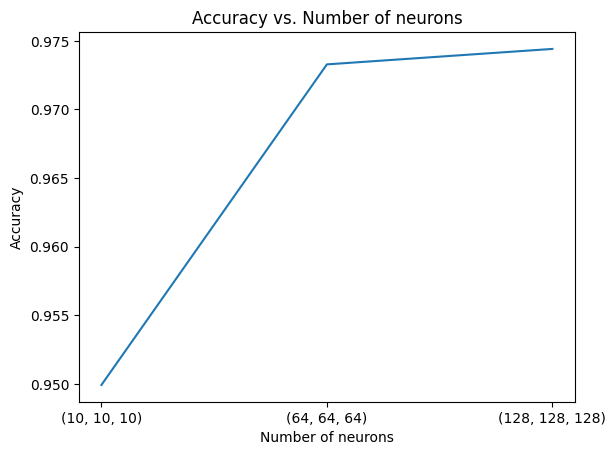

In [16]:
# Define number of neurons with three hidden layers for each model
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

# Test the neural network models with different numbers of neurons
accuracies = []
for num_neurons in nn_three_neurons:
    fold_accuracies = cross_validate(num_neurons)
    avg_accuracy = np.mean(fold_accuracies)
    accuracies.append(avg_accuracy)

# Plot the accuracies for different numbers of neurons
plt.plot([str(nn) for nn in nn_three_neurons], accuracies)
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of neurons')
plt.show()

Based on the accuracies obtained, the performance of the three neural network models can be ranked as follows:

- Model with 3 hidden layers and 128 neurons in each layer, with an overall accuracy of 0.9744
- Model with 3 hidden layers and 64 neurons in each layer, with an overall accuracy of 0.9733
- Model with 3 hidden layers and 10 neurons in each layer, with an overall accuracy of 0.9499

Therefore, the model with the highest overall accuracy is the one with 3 hidden layers and 128 neurons in each layer, followed closely by the model with 3 hidden layers and 64 neurons in each layer. The model with 3 hidden layers and 10 neurons in each layer has the lowest overall accuracy.

## Conclusion

Through this project, we explored the effectiveness of various machine learning models in classifying handwritten digits from the MNIST dataset. We used k-nearest neighbors and neural networks with one, two, and three hidden layers with different numbers of neurons in each layer.

For the k-nearest neighbors algorithm, we achieved a maximum accuracy of 0.988 with k = 1 and k = 3. However, this method suffers from high memory usage and has no model representation for debugging and exploration.

For the neural network with one hidden layer, we achieved the highest accuracy of 0.9777 using a model with 256 neurons. The performance of the models generally improved as the number of neurons increased. However, these models were overfitting, as evidenced by the training accuracies being close to 100% while the test accuracies were not improving much after a certain point.

For the neural network with two hidden layers, we achieved the highest accuracy of 0.9810 using a model with two hidden layers, each having 256 neurons. The performance of the models improved compared to the neural network with one hidden layer. This suggests that using multiple hidden layers can further enhance the performance of neural networks.

For the neural network with three hidden layers, we achieved the highest accuracy of 0.9744 using a model with three hidden layers, each having 128 neurons. The performance of the models was generally lower than that of the models with two hidden layers. This suggests that using too many hidden layers can lead to overfitting, especially with limited data.

Overall, the neural network with two hidden layers and 256 neurons in each layer performed the best, achieving an accuracy of 0.9810. However, it is important to note that the choice of model depends on the specific application and dataset. It is crucial to consider factors such as performance, model complexity, and interpretability when selecting a machine learning model.